In [39]:
import cv2 as cv 
import glob
import numpy as np
import imageio 
import matplotlib.pyplot as plt

# cv.oct.setUseOptimized(False)

import warnings
warnings.filterwarnings("ignore")

In [40]:
feature_extraction_algo  = "sift"

feature_to_match = 'bf'         #bruteforce

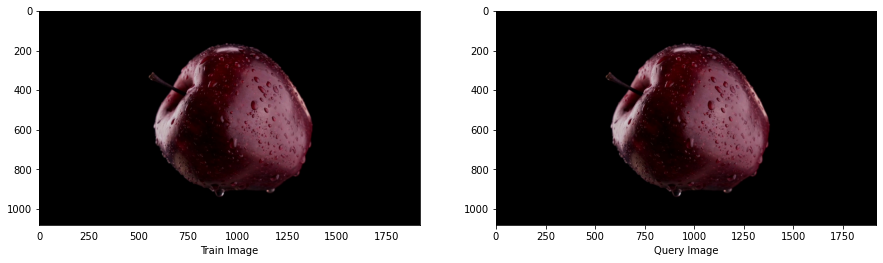

In [41]:
train = cv.imread(r'D:\agnext\Agnext\OpenCv\_Image_stiching\rotating_vid_img\frame3.jpg')
train = cv.cvtColor(train, cv.COLOR_BGR2RGB)
train_g = cv.cvtColor(train, cv.COLOR_RGB2GRAY)


query = cv.imread(r'D:\agnext\Agnext\OpenCv\_Image_stiching\rotating_vid_img\frame2.jpg')
query = cv.cvtColor(query, cv.COLOR_BGR2RGB)
query_g = cv.cvtColor(query, cv.COLOR_RGB2GRAY)


fig , (ax1, ax2) = plt.subplots(1, 2, constrained_layout= False, figsize=(15,7))
ax1.imshow(train)
ax1.set_xlabel('Train Image')
ax1.xaxis.set_ticks_position('none')
ax2.imshow(query)
ax2.set_xlabel('Query Image')
plt.show()

In [42]:
# Initiate SIFT detector - feature detection

sift = cv.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(train_g, None)


# in above line we are passing None as mask. keypoints and descriptors are returned in two separate lists.
# keypoints is a list keypoints and descriptors is a numpy array of shape (n, 128) where n is the number of keypoints.

# descriptors should definne the feature 

    #  should be keypoints postiotion independent 
    # should be keypoints orientation independent
    # should be keypoints size independent (scale invariant)

In [43]:
# clean this fucking function just one time return 

def select_descriptor_method(image, Method = None):

    if Method == 'sift':
        sift = cv.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(image, None)
        return keypoints, descriptors
    elif Method == 'surf':
        surf = cv.SURF_create()
        keypoints, descriptors = surf.detectAndCompute(image, None)
        return keypoints, descriptors
    elif Method == 'orb':
        orb = cv.ORB_create()
        keypoints, descriptors = orb.detectAndCompute(image, None)
        return keypoints, descriptors
    elif Method == 'akaze':
        akaze = cv.AKAZE_create()
        keypoints, descriptors = akaze.detectAndCompute(image, None)
        return keypoints, descriptors
    elif Method == 'brisk':
        brisk = cv.BRISK_create()
        keypoints, descriptors = brisk.detectAndCompute(image, None)
        return keypoints, descriptors
    elif Method == 'freak':
        freak = cv.FREAK_create()
        keypoints, descriptors = freak.detectAndCompute(image, None)
        return keypoints, descriptors
    elif Method == 'brief':
        brief = cv.BRIEF_create()
        keypoints, descriptors = brief.detectAndCompute(image, None)
        return keypoints, descriptors
    elif Method == 'kaze':
        kaze = cv.KAZE_create()
        keypoints, descriptors = kaze.detectAndCompute(image, None)
        return keypoints, descriptors
    elif Method == 'msd':
        msd = cv.MSD_create()
        keypoints, descriptors = msd.detectAndCompute(image, None)
        return keypoints, descriptors
    else:
        print('Invalid Method {Bro get your head straight}')
        return None, None

In [44]:
keypoints_t, descriptors_t = select_descriptor_method(train_g, feature_extraction_algo)

keypoints_q, descriptors_q = select_descriptor_method(query_g , feature_extraction_algo)




In [45]:
for points in keypoints_q: 
    print(points.pt)
    print(points.size)
    print(points.angle)
    print(points.response)
    print(points.octave)
    print(points.class_id)
    print('\n')
    break 
    

print(descriptors_q.shape)
print(len(keypoints_q))
print("see told ya descriptors shape is (n, 128) where n in number of keypoints\n\n")
print("so what happen is for each keypoint its 16 X 16 neighbourhood is taken and then it is divided into 4x4 blocks and then each block is converted to a 8 bin histogram is greated")
print("Do the math dumbass 4 X 4 X 8 :", 4*4*8, end="\n\n")
print("so the descriptors shape is (n, 128) where n is number of keypoints and 128 is the length of descriptor")
    

(556.125, 332.875732421875)
4.116213321685791
30.18927001953125
0.040062304586172104
9830656
-1


(1369, 128)
1369
see told ya descriptors shape is (n, 128) where n in number of keypoints


so what happen is for each keypoint its 16 X 16 neighbourhood is taken and then it is divided into 4x4 blocks and then each block is converted to a 8 bin histogram is greated
Do the math dumbass 4 X 4 X 8 : 128

so the descriptors shape is (n, 128) where n is number of keypoints and 128 is the length of descriptor


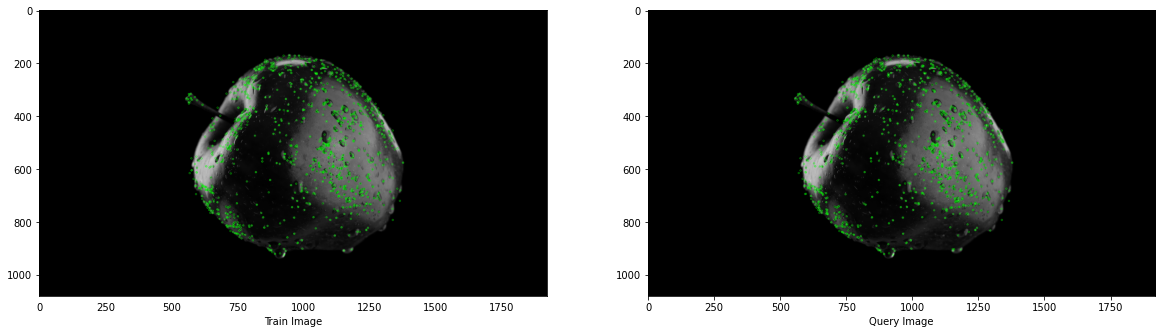

In [46]:


fig , (ax1, ax2) = plt.subplots(1, 2, constrained_layout= False, figsize=(20,15))
ax1.imshow(cv.drawKeypoints(train_g, keypoints_t, None, color= (0,255,0)))
ax1.set_xlabel('Train Image')
ax1.xaxis.set_ticks_position('none')
ax2.imshow(cv.drawKeypoints(query_g, keypoints_q, None, color= (0,255,0)))
ax2.set_xlabel('Query Image')
plt.show()

# Now we will match the features to corrousponding key points 

In [47]:
def create_matching_object(method,crossCheck):
    "Create and return a Matcher Object"
    
    # For BF matcher, first we have to create the BFMatcher object using cv2.BFMatcher(). 
    # It takes two optional params. 
    # normType - It specifies the distance measurement
    # crossCheck - which is false by default. If it is true, Matcher returns only those matches 
    # with value (i,j) such that i-th descriptor in set A has j-th descriptor in set B as the best match 
    # and vice-versa. 
    if method == 'sift' or method == 'surf':
        bf = cv.BFMatcher(cv.NORM_L2, crossCheck=crossCheck)
    elif method == 'orb' or method == 'brisk':
        bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=crossCheck)
    return bf
    

In [48]:
def key_points_matching(features_train_img, features_query_img, method):
    bf = create_matching_object(method, crossCheck=True)
        
    # Match descriptors.
    best_matches = bf.match(features_train_img,features_query_img)
    
    # Sort the features in order of distance.
    # The points with small distance (more similarity) are ordered first in the vector
    rawMatches = sorted(best_matches, key = lambda x:x.distance)
    print("Raw matches with Brute force):", len(rawMatches))
    return rawMatches

In [49]:
def key_points_matching_KNN(features_train_img, features_query_img, method, ratio = .9, k = 2):
    bf = create_matching_object(method, crossCheck=False)
    # compute the raw matches and initialize the list of actual matches
    rawMatches = bf.knnMatch(features_train_img, features_query_img, k= k)
    print("Raw matches (knn):", len(rawMatches))
    matches = []

    # loop over the raw matches
    for m,n in rawMatches:
        # ensure the distance is within a certain ratio of each
        # other (i.e. Lowe's ratio test)
        if m.distance < n.distance * ratio:
            matches.append(m)
    return matches

In [50]:
# print(key_points_matching_KNN(train_g, query_g, feature_extraction_algo, ratio = 1))

Drawing: bf matched features Lines
1352 1369
1352 1369
Raw matches with Brute force): 731


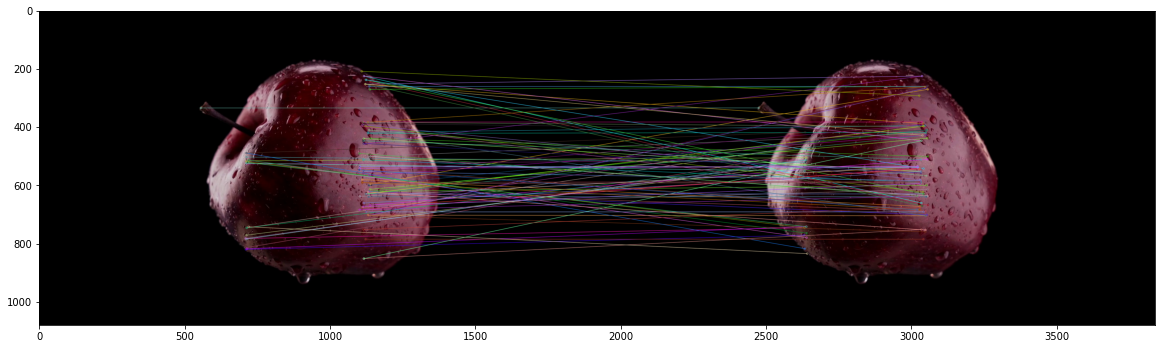

In [51]:
feature_to_match = 'bf'
print("Drawing: {} matched features Lines".format(feature_to_match))

fig = plt.figure(figsize=(20,8))

print(len(keypoints_t), len(keypoints_q))
print(len(descriptors_t), len(descriptors_q))




if feature_to_match == 'bf':
    matches = key_points_matching(train_g, query_g, method=feature_extraction_algo)

    
    mapped_features_image = cv.drawMatches(train,keypoints_t,query,keypoints_q,matches[:100],
                           None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Now for cross checking draw the feature-mapping lines also with KNN
elif feature_to_match == 'knn':
    matches = key_points_matching_KNN(train_g, train_g, ratio=0.75, method=feature_extraction_algo)
    
    mapped_features_image = cv.drawMatches(train, keypoints_t, query, keypoints_q, np.random.choice(matches,100),
                           None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    

plt.imshow(mapped_features_image)
# plt.axis('off')
# plt.savefig("./output/" + feature_to_match + "_matching_img_"+'.jpeg', bbox_inches='tight', 
#             dpi=300, optimize=True, format='jpeg')
# plt.show()


Now we will calculate the homography matrix (it is kind of a Translational matrix) the homaographic matrix is calculated for a surface and them all the point on that surface is translate useing the homaographic matrix 
cool no 


now we will use RANSAC to calculate (estimate) the homography matrix

what RANSAC does 

Repeat N times : 
    Select a random set of features (4 pairs of features)
    fit an homography matrix
    compute the inliers : apply the homography matrix to each point and calculate the error (distance between actual and predicted points) || AP - PP || < c 

select homography matrix with least error (or most number of inlier points)

In [52]:
def find_the_homography(keypoints_t,keypoints_q, matches, ReprojThreshold):
    """ converting the keypoints to numpy arrays before passing them for calculating Homography Matrix.
    
    Because we are supposed to pass 2 arrays of coordinates to cv2.findHomography, as in I have these points in image-1, and I have points in image-2, so now what is the homography matrix to transform the points from image 1 to image 2
    """

    keypoints_train_img = np.float32([keypoint.pt for keypoint in keypoints_t])
    keypoints_query_img = np.float32([keypoint.pt for keypoint in keypoints_q])
    
    ''' For findHomography() - I need to have an assumption of a minimum of correspondence points that are present between the 2 images. Here, I am assuming that Minimum Match Count to be 4 '''
    if len(matches) > 0:
        # construct the two sets of points
        points_train = np.float32([keypoints_train_img[m.queryIdx] for m in matches])
        points_query = np.float32([keypoints_query_img[m.trainIdx] for m in matches])
        
        # Calculate the homography between the sets of points
        (H, status) = cv.findHomography(points_train, points_query, cv.RANSAC, ReprojThreshold)

        return (matches, H, status)
    else:
        return None
   

In [53]:
M = find_the_homography(keypoints_t, keypoints_q, matches, ReprojThreshold=4)

if M is None:
    print("Error!")

(matches, Homography_Matrix, status) = M

print(Homography_Matrix)

[[ 9.21289326e-01  2.49359128e-02  2.88593788e+01]
 [ 4.06942413e-02  9.60672722e-01 -4.34600881e+01]
 [-4.92116772e-05  2.66150474e-05  1.00000000e+00]]


width  3840


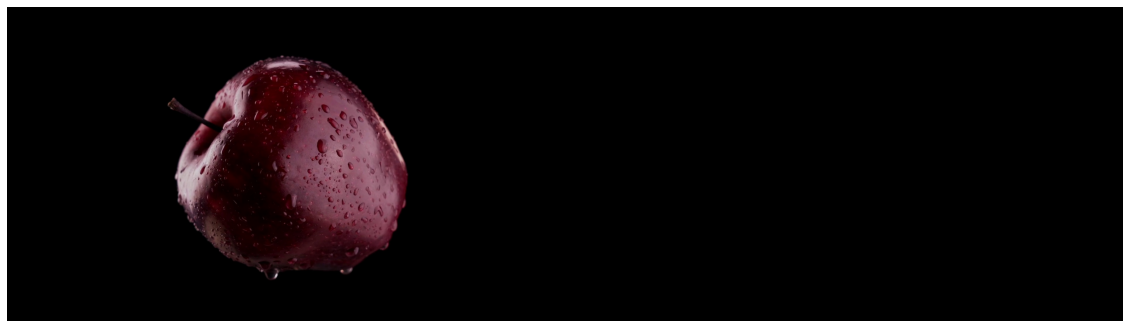

In [55]:
# For the calculation of the width and height of the final horizontal panoramic images 
# I can just add the widths of the individual images and for the height
# I can take the max from the 2 individual images.

width = query.shape[1] + train.shape[1]
print("width ", width) 
# 2922 - Which is exactly the sum value of the width of 
# my train.jpg and query.jpg


height = max(query.shape[0], train.shape[0])

# otherwise, apply a perspective warp to stitch the images together

# Now just plug that "Homography_Matrix"  into cv::warpedPerspective and I shall have a warped image1 into image2 frame

result = cv.warpPerspective(train, Homography_Matrix,  (width, height))


# The warpPerspective() function returns an image or video whose size is the same as the size of the original image or video. Hence set the pixels as per my query_photo

result[0:query.shape[0], 0:query.shape[1]] = query

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(result)

# imageio.imwrite("./output/horizontal_panorama_img_"+'.jpeg', result)

plt.show()

In [60]:
stitcher = cv.Stitcher()
(result, vis) = stitcher.stitch(train, query)

print(vis)

# plt.imshow(result)
# plt.show()

error: Unknown C++ exception from OpenCV code